In [62]:
import sys
sys.path.append('../')
import numpy as np
import importlib
import dataloader as loader
import curvefit_models as models
import curvefit_pipeline as p
import matplotlib.pyplot as plt
import datetime as dt
import pickle
importlib.reload(p)
importlib.reload(loader)
importlib.reload(models)

<module 'curvefit_models' from '..\\curvefit_models.py'>

In [63]:
data_format = {'name': 'deaths_raw', 'smoothing': 9, 'val_steps': 0}
model_params = {'name': 'ExpNormModel'}
horizon = 14
samples = 250
quantiles = [10, 20, 30, 40, 50, 60, 70, 80, 90]

today = dt.date.today()
output_file = f'../predictions/predictions-{str(today)}.csv'
sample_file = 'sample_submission.csv'

In [64]:
with open('use_c.dat', 'rb') as handle:
    use_c = pickle.load(handle)

In [65]:
pipeline = p.Pipeline(data_format, model_params, horizon, use_c)
pipeline.run()

Fitting 3142/3142


In [66]:
pipeline.predict(quantiles=quantiles, samples=samples)

In [68]:
pipeline.write_to_file(output_file, sample_file, quantiles)

In [71]:
pred2 = pipeline.get_combined_predictions(quantiles=quantiles, samples=250)

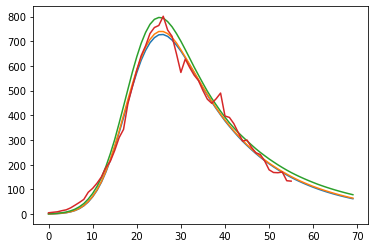

In [77]:
# 1208**, 1200, 716, 1382, 204, 1791, 1868, 1858, 2969, 1887, 1308, 1224, 1776-1794, 2289**, 2848, 3087**, 1138*, 1280, 1293**, 1870**
county = 1858
x = np.arange(0, pred2[county].shape[0])
y = pred2[county][:, 3]
plt.plot(x, y)

y = pred2[county][:, 4]
plt.plot(x, y)

y = pred2[county][:, 8]
plt.plot(x, y)

d = pipeline.data.daily_smoothed[county]
x = np.linspace(0, d.shape[0] - 1, d.shape[0])
y = d
plt.plot(x, y)